# Eleições para segundo turno em Duque de Caxias - RJ

Antes de qualquer código e gráfico, vamos a alguns conceitos que serão colocados nas análises a seguir:

As eleições para os cargos executivos (prefeito, governador e presidente) são eleições majoritárias, isto é, o candidato eleito será o que tiver mais votos. A questão levantada e analisada a seguir, é que o cálculo da eleição, é feita em cima dos votos válidos.

Este trabalho, porém, traz para análise, os votos ou eleitores que não são considerados. Então, será mostrado no cálculo, os votos brancos e nulos, como também as abstenções.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from eleicoes_analysis import *

df = pd.read_csv('detalhe_votacao_secao_DC_2016_RJ.csv')

numeros_consolidados = getConsolidateNumbers(df)
total_votos_validos = numeros_consolidados.get('validos')
total_votos_nao_considerados = numeros_consolidados.get('nao_considerados')
total_abstencoes = numeros_consolidados.get('abstencoes')
total_brancos = numeros_consolidados.get('brancos')
total_nulos = numeros_consolidados.get('nulos')

## Visualizando os dados

### Visualizando os dados em geral

#### Proporção de eleitores considerados (votos válidos) em relação aos não considerados

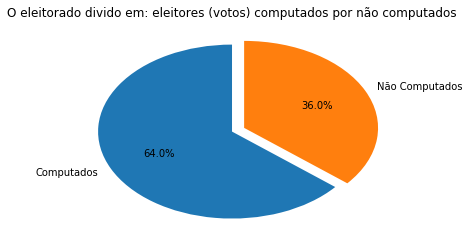

In [2]:
dados = [total_votos_validos, total_votos_nao_considerados]
labels = [ 'Computados', 'Não Computados' ]
explode = (0, 0.1)

plt.title('O eleitorado divido em: eleitores (votos) computados por não computados')
plt.pie(dados, labels = labels, startangle = 90, explode=explode, autopct='%1.1f%%')
plt.show()

#### Visualizando a divisão entre os não considerados

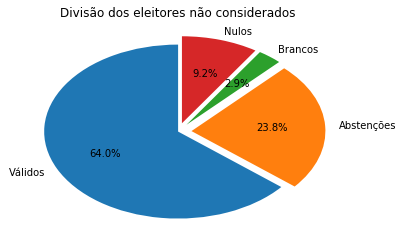

In [3]:
dados = [total_votos_validos, total_abstencoes, total_brancos, total_nulos]
labels = [ 'Válidos', 'Abstenções', 'Brancos', 'Nulos' ]
explode = (0, 0.1, 0.1, 0.1)

plt.title('Divisão dos eleitores não considerados')
plt.pie(dados, labels = labels, startangle = 90, autopct='%1.1f%%', explode=explode)
plt.show()

### Visualizando os dados por zona

#### Proporção de eleitores considerados (votos válidos) em relação aos não considerados

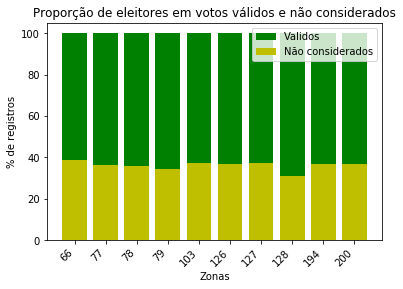

In [4]:
width = 0.8
agrupado_por_zona = getConsolidateNumbersByZona(df)
zonas = agrupado_por_zona.index.values
validos = agrupado_por_zona['votos_nominais'].values
nao_considerados = agrupado_por_zona['nao_considerados'].values

total = agrupado_por_zona['aptos'].values
proportion_validos = np.true_divide(validos, total) * 100
proportion_nao_considerados = np.true_divide(nao_considerados, total) * 100

index = np.arange(len(zonas))
plt.bar(index, proportion_validos, width = width, bottom=proportion_nao_considerados, color='green', label = 'Validos')
plt.bar(index, proportion_nao_considerados, width = width, color='y', label = 'Não considerados')
plt.xlabel('Zonas', fontsize=10)
plt.ylabel('% de registros', fontsize=10)
plt.xticks(index, zonas)
plt.title('Proporção de eleitores em votos válidos e não considerados')
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylim=1.0
plt.legend(loc='best')
plt.show()

#### Visualizando a divisão entre os não considerados

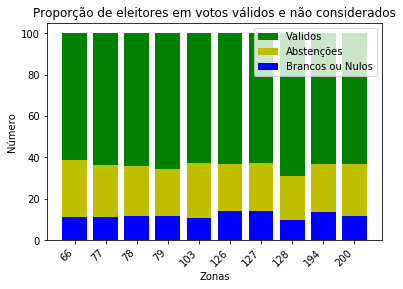

In [13]:
width = 0.8
agrupado_por_zona = getConsolidateNumbersByZona(df)
zonas = agrupado_por_zona.index.values
validos = agrupado_por_zona['votos_nominais'].values
abstencoes = agrupado_por_zona['abstencoes'].values
invalidos = agrupado_por_zona['votos_brancos'].values + agrupado_por_zona['votos_nulos'].values

total = agrupado_por_zona['aptos'].values
proportion_validos = np.true_divide(validos, total) * 100
proportion_abstencoes = np.true_divide(abstencoes, total) * 100
proportion_invalidos = np.true_divide(invalidos, total) * 100

index = np.arange(len(zonas))
plt.bar(index, proportion_validos, width = width, bottom=proportion_abstencoes + proportion_invalidos, color='green', label = 'Validos')
plt.bar(index, proportion_abstencoes, width = width, bottom=proportion_invalidos, color='y', label = 'Abstenções')
plt.bar(index, proportion_invalidos, width = width, color='blue', label = 'Brancos ou Nulos')
plt.xlabel('% de registros', fontsize=10)
plt.ylabel('Número', fontsize=10)
plt.xticks(index, zonas)
plt.title('Proporção de eleitores em votos válidos e não considerados')
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylim=1.0
plt.legend(loc='best')
plt.show()

### Visualizando os dados por seção

O objetivo aqui é trazer as dez seções com mais eleitores aptos

#### Proporção de eleitores considerados (votos válidos) em relação aos não considerados

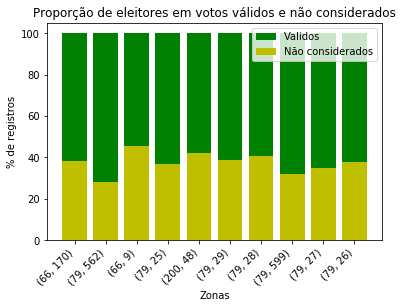

In [17]:
# ordenando por quantidade de aptos
sorted = df.sort_values(by='aptos', ascending=False)
items = sorted.iloc[:10]
zonas = items_grouped.index.values
validos = items_grouped['votos_nominais'].values
nao_considerados = items_grouped['nao_considerados'].values

total = items_grouped['aptos'].values
proportion_validos = np.true_divide(validos, total) * 100
proportion_nao_considerados = np.true_divide(nao_considerados, total) * 100

index = np.arange(len(zonas))
plt.bar(index, proportion_validos, width = width, bottom=proportion_nao_considerados, color='green', label = 'Validos')
plt.bar(index, proportion_nao_considerados, width = width, color='y', label = 'Não considerados')
plt.xlabel('Zonas', fontsize=10)
plt.ylabel('% de registros', fontsize=10)
plt.xticks(index, zonas)
plt.title('Proporção de eleitores em votos válidos e não considerados')
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylim=1.0
plt.legend(loc='best')
plt.show()

#### Visualizando a divisão entre os não considerados

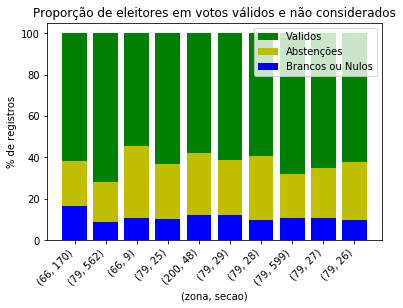

In [18]:
items_grouped = getConsolidateNumbersByZonaSecao(items).sort_values(by='aptos', ascending=False)
validos = items_grouped['votos_nominais'].values
abstencoes = items_grouped['abstencoes'].values
invalidos = items_grouped['votos_brancos'].values + items_grouped['votos_nulos'].values

total = items_grouped['aptos'].values
proportion_validos = np.true_divide(validos, total) * 100
proportion_abstencoes = np.true_divide(abstencoes, total) * 100
proportion_invalidos = np.true_divide(invalidos, total) * 100

index = np.arange(len(zonas))
plt.bar(index, proportion_validos, width = width, bottom=proportion_abstencoes + proportion_invalidos, color='green', label = 'Validos')
plt.bar(index, proportion_abstencoes, width = width, bottom=proportion_invalidos, color='y', label = 'Abstenções')
plt.bar(index, proportion_invalidos, width = width, color='blue', label = 'Brancos ou Nulos')
plt.xlabel('(zona, secao)', fontsize=10)
plt.ylabel('% de registros', fontsize=10)
plt.xticks(index, zonas)
plt.title('Proporção de eleitores em votos válidos e não considerados')
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylim=1.0
plt.legend(loc='best')
plt.show()